# 1) Exploratory Data Analysis Netflix

In [35]:
#importing modules.

import numpy as np
import pandas as pd

#plots

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime

#ignore the warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the file

df = pd.read_csv('Netflix Userbase.csv')
np.random.seed(0)

In [4]:
print(f'The dataset have {df.shape[0]} rows and {df.shape[1]} columns')

The dataset have 2500 rows and 10 columns


In [5]:
# Top 2 rows

df.head(2)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month


In [6]:
# Last 2 rows

df.tail(2)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [7]:
# we Don't want UserID So,we drop it

df.drop('User ID',axis = 1,inplace=True)

In [8]:
df.head(2)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month


In [9]:
df.dtypes

Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Join Date          2500 non-null   object
 3   Last Payment Date  2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   Plan Duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 175.9+ KB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly Revenue,2500.0,12.5084,1.686851,10.0,11.0,12.0,14.0,15.0
Age,2500.0,38.7956,7.171778,26.0,32.0,39.0,45.0,51.0


In [12]:
#Check if dataset have any na's.

df.isnull().sum()

Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

- There is no null values in the dataset

In [13]:
# Check the duplicate values.

duplicates = df[df.duplicated()]
if duplicates.empty:
    print("No Duplicates found")
else:
    print('Duplicates Found')

    print(duplicates)

No Duplicates found


In [14]:
#Changing dates in the datetime format

df['Join Date'] = pd.to_datetime(df['Join Date'])

df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# handling the datetime features

df['Join Year'] = df['Join Date'].dt.year
df['Join Month'] = df['Join Date'].dt.month
df['Last Payment Year'] = df['Last Payment Date'].dt.year
df['Last Payment Month'] = df['Last Payment Date'].dt.month
df['Account till'] = (pd.to_datetime('today') - df['Join Date']).dt.days


In [15]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Join Year,Join Month,Last Payment Year,Last Payment Month,Account till
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,2022,1,2023,10,572
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,2021,5,2023,6,823
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023,2,2023,6,163
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,2022,10,2023,6,307
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023,1,2023,6,217


In [16]:
df.rename(columns={'Plan Duration':'Plan Duration(months)'},inplace=True)

for i in range(len(df)):
    df['Plan Duration(months)'] = df['Plan Duration(months)'][i][0]

In [17]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration(months),Join Year,Join Month,Last Payment Year,Last Payment Month,Account till
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1,2022,1,2023,10,572
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1,2021,5,2023,6,823
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1,2023,2,2023,6,163
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1,2022,10,2023,6,307
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1,2023,1,2023,6,217


In [18]:
# Adding new columns are filled with dummy values based on previous features

# Feature encoding

subsciption_type_en = pd.get_dummies(df['Subscription Type'],prefix= 'Subsciption type')
#print(subsciption_type_en)
df = pd.concat([df,subsciption_type_en],axis = 1)

country_en = pd.get_dummies(df['Country'],prefix='Country type')
df = pd.concat([df,country_en],axis = 1)

gender_en = pd.get_dummies(df['Gender'],prefix='Gender type')
df = pd.concat([df,gender_en],axis = 1)

device_en = pd.get_dummies(df['Device'],prefix='Device type')
df = pd.concat([df,device_en],axis = 1)

# feature transform

df['Age Bins'] = pd.cut(df['Age'],bins = [0,18,28,38,48,58,100],
                        labels=['<18','18-27','28-37','38-47','48-57','58+'])

In [19]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration(months),Join Year,...,Country type_Spain,Country type_United Kingdom,Country type_United States,Gender type_Female,Gender type_Male,Device type_Laptop,Device type_Smart TV,Device type_Smartphone,Device type_Tablet,Age Bins
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1,2022,...,0,0,1,0,1,0,0,1,0,18-27
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1,2021,...,0,0,0,1,0,0,0,0,1,28-37
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1,2023,...,0,1,0,0,1,0,1,0,0,38-47
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1,2022,...,0,0,0,1,0,1,0,0,0,48-57
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1,2023,...,0,0,0,0,1,0,0,1,0,28-37


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Subscription Type            2500 non-null   object        
 1   Monthly Revenue              2500 non-null   int64         
 2   Join Date                    2500 non-null   datetime64[ns]
 3   Last Payment Date            2500 non-null   datetime64[ns]
 4   Country                      2500 non-null   object        
 5   Age                          2500 non-null   int64         
 6   Gender                       2500 non-null   object        
 7   Device                       2500 non-null   object        
 8   Plan Duration(months)        2500 non-null   object        
 9   Join Year                    2500 non-null   int64         
 10  Join Month                   2500 non-null   int64         
 11  Last Payment Year            2500 non-null 

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Monthly Revenue,2500.0,12.5084,1.686851,10.0,11.0,12.0,14.0,15.0
Age,2500.0,38.7956,7.171778,26.0,32.0,39.0,45.0,51.0
Join Year,2500.0,2022.0096,0.143931,2021.0,2022.0,2022.0,2022.0,2023.0
Join Month,2500.0,7.3232,2.712653,1.0,6.0,7.0,10.0,12.0
Last Payment Year,2500.0,2023.0000,0.000000,2023.0,2023.0,2023.0,2023.0,2023.0
Last Payment Month,2500.0,6.2332,2.645150,1.0,5.0,6.0,8.0,12.0
Account till,2500.0,375.6620,94.007452,-113.0,305.0,368.0,421.0,823.0
Subsciption type_Basic,2500.0,0.3996,0.489914,0.0,0.0,0.0,1.0,1.0
Subsciption type_Premium,2500.0,0.2932,0.455320,0.0,0.0,0.0,1.0,1.0
Subsciption type_Standard,2500.0,0.3072,0.461425,0.0,0.0,0.0,1.0,1.0


In [22]:
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration(months),Join Year,...,Country type_Spain,Country type_United Kingdom,Country type_United States,Gender type_Female,Gender type_Male,Device type_Laptop,Device type_Smart TV,Device type_Smartphone,Device type_Tablet,Age Bins
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1,2022,...,0,0,1,0,1,0,0,1,0,18-27
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1,2021,...,0,0,0,1,0,0,0,0,1,28-37
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1,2023,...,0,1,0,0,1,0,1,0,0,38-47
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1,2022,...,0,0,0,1,0,1,0,0,0,48-57
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1,2023,...,0,0,0,0,1,0,0,1,0,28-37


In [23]:
df.shape

(2500, 34)

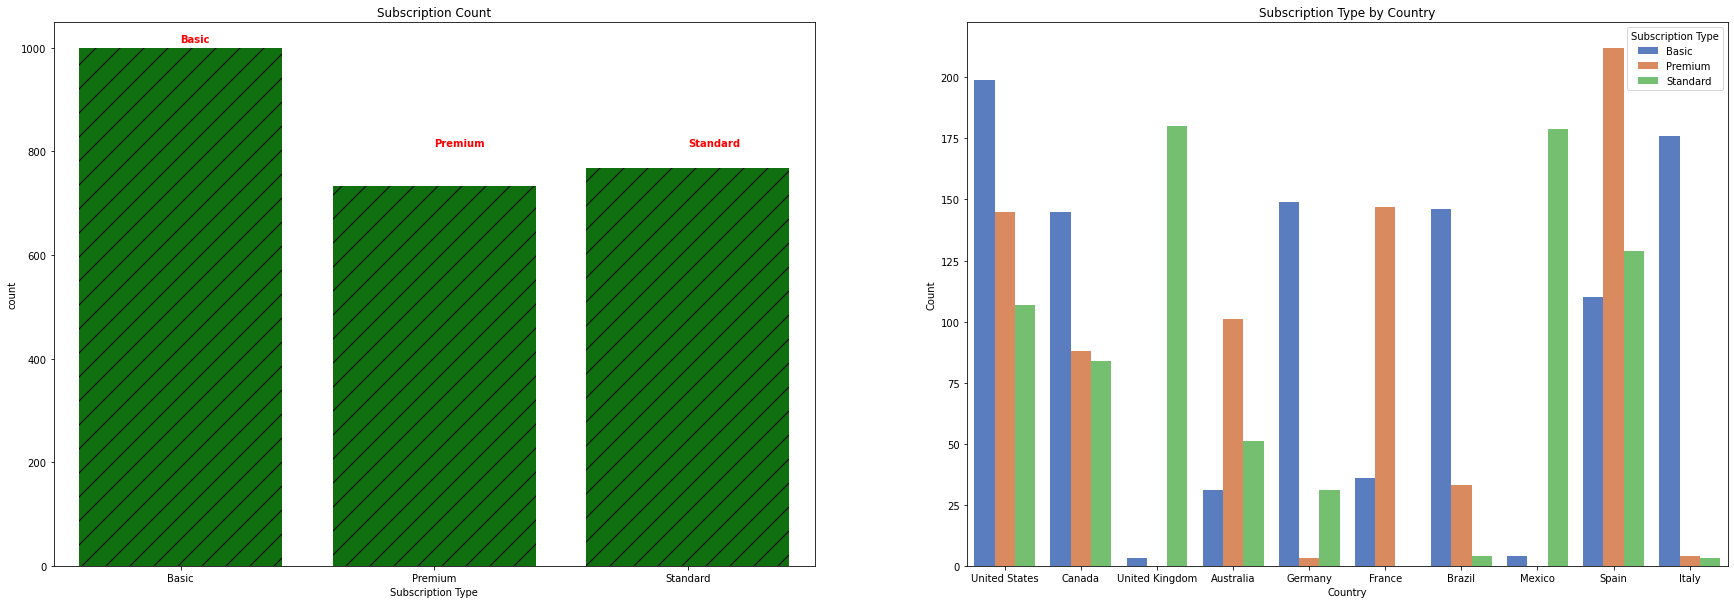

In [24]:
# Check if which subscription is higher and subscription type.

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.title("Subscription Count")
sns.countplot(x = 'Subscription Type',
             data = df,
             color = 'green',hatch = '/')

#apply text on plots

plt.text(0,1010,'Basic',fontsize = 10, fontweight = 'bold',color = 'red')
plt.text(1,810,'Premium',fontsize = 10, fontweight = 'bold',color = 'red')
plt.text(2,810,'Standard',fontsize = 10, fontweight = 'bold',color = 'red')

plt.subplot(1,2,2)
sns.countplot(data = df,x = 'Country',
             hue = 'Subscription Type',
             palette='muted')

plt.title('Subscription Type by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title = 'Subscription Type')
plt.show()

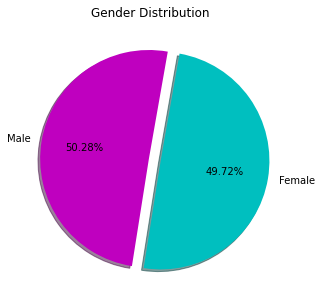

In [25]:
# Gender Distribution

plt.figure(figsize=(10,5))
gender = df.Gender.value_counts()
index = ['Male','Female']
color = ['m','c']
exp = [0.01,0.1]
values = gender.values.tolist()

plt.pie(values,
       labels=index,
       autopct='%.2f%%',
       colors=color,
       explode = exp,
       shadow=True,
       startangle=80)
plt.title("Gender Distribution")

plt.show()

#### # Age Distribution

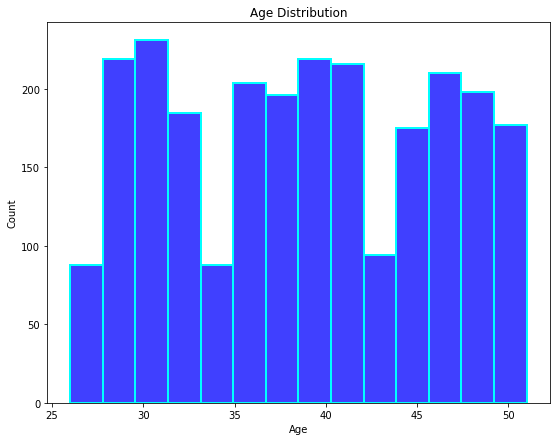

In [26]:


plt.figure(figsize=(9,7))
sns.histplot(data = df,
            x = 'Age',
            stat = 'count',
            color = 'b',
            edgecolor = 'cyan',
            lw = 2)

plt.title("Age Distribution")
plt.show()

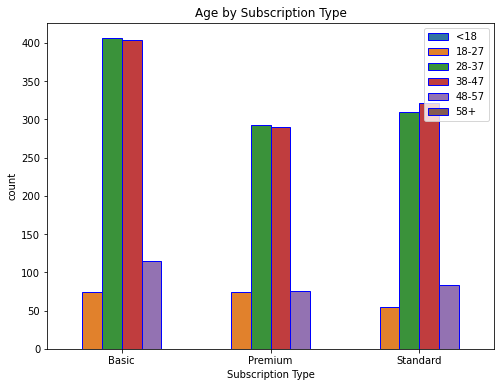

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Subscription Type',
             data = df,
             hue = 'Age Bins',
             edgecolor = 'blue',
             lw = 1)

plt.title('Age by Subscription Type')
plt.legend(loc = 'upper right')
plt.show()

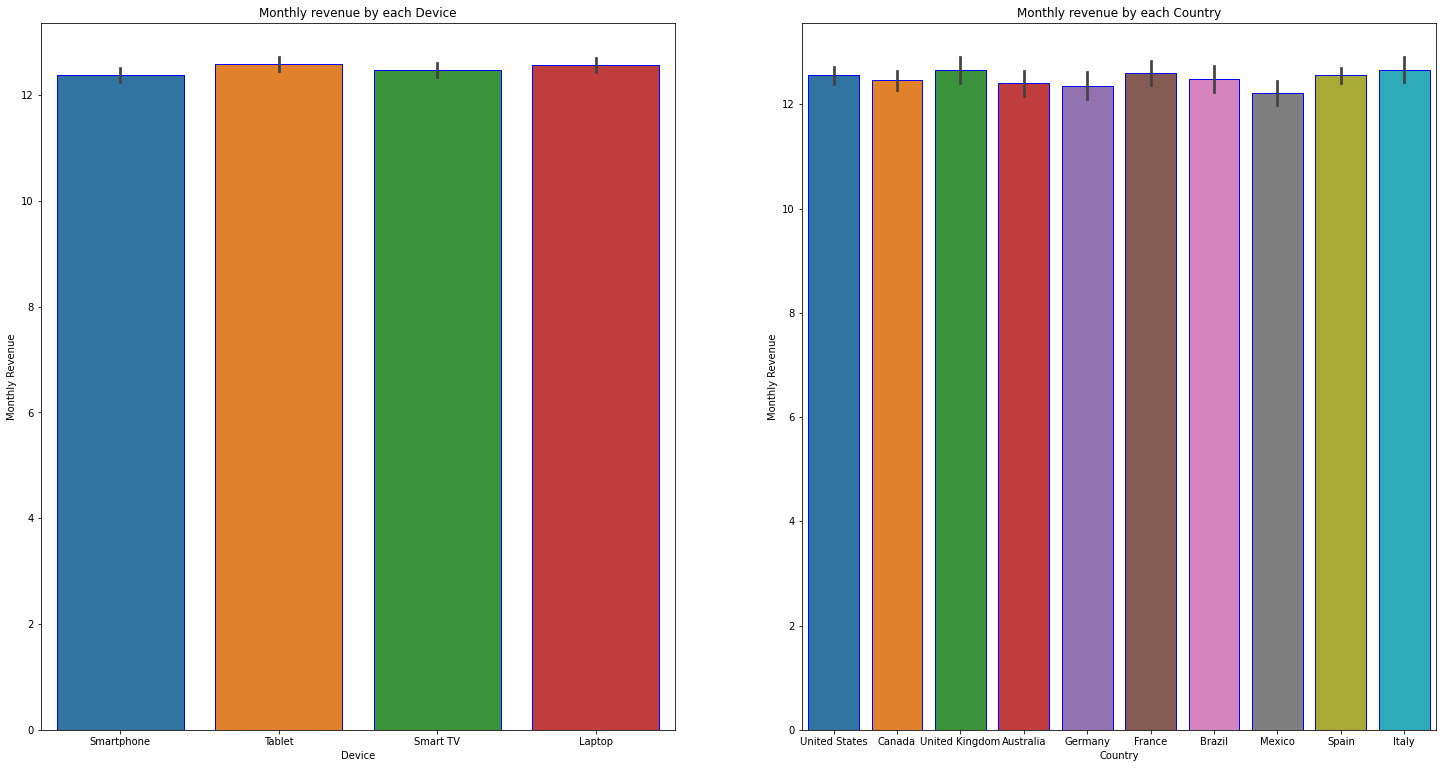

In [28]:
# Monthly revenue by each devices and each country.

plt.figure(figsize=(25,13))
plt.subplot(1,2,1)

#device by revenue
sns.barplot(x = 'Device',
           y= 'Monthly Revenue',
           data = df,
           edgecolor = 'blue')
plt.title("Monthly revenue by each Device")

#Country by revenue
plt.subplot(1,2,2)
sns.barplot(x = 'Country',
           y = 'Monthly Revenue',
           data = df,
           edgecolor = 'blue')
plt.title("Monthly revenue by each Country")
plt.show()


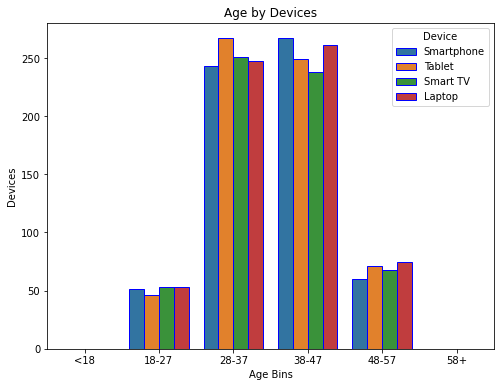

In [29]:
# what age peoples using which devices.
plt.figure(figsize=(8,6))
sns.countplot(x = 'Age Bins',
             hue = 'Device',
             data = df,
             edgecolor = 'blue',
             lw = 1)
plt.title('Age by Devices')
plt.ylabel('Devices')
plt.show()

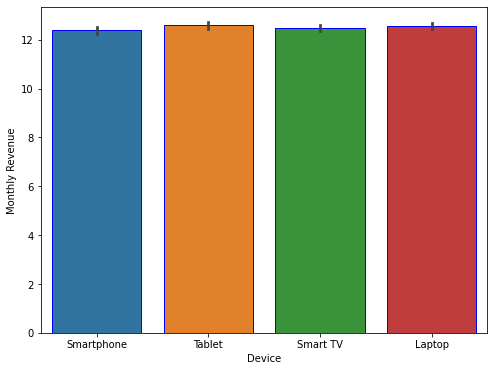

In [30]:
# Monthly revenue by devices
plt.figure(figsize=(8,6))
sns.barplot(x = 'Device',
           y = 'Monthly Revenue',
           data = df,
           edgecolor = 'blue')
plt.show()

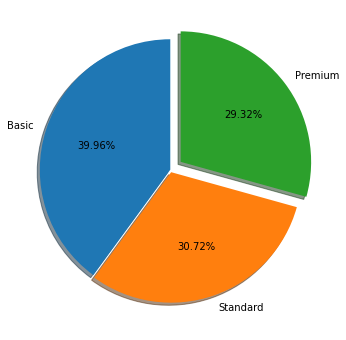

In [31]:
# Percentage of subscription

x = df['Subscription Type'].value_counts(ascending = False)
index = [i for i in x.index]
var = [0,0.02,0.1]
plt.figure(figsize=(8,6))
plt.pie(x.values,
       labels=index,
       autopct='%.2f%%',
       explode = var,
       shadow = True,
       startangle=90)

plt.show()

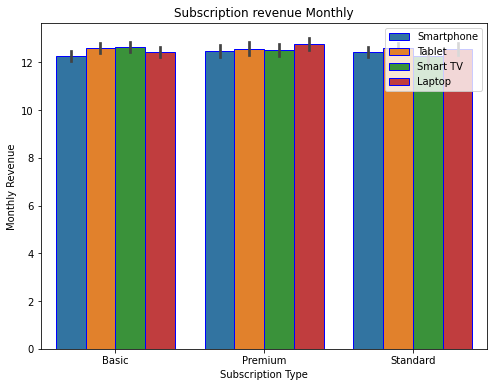

In [32]:
# Subscription revenue every month
plt.figure(figsize=(8,6))
sns.barplot(x = 'Subscription Type',
           y = 'Monthly Revenue',
           hue = 'Device',
           data = df,
           edgecolor = 'blue',
           lw = 1)
plt.legend(loc = 'upper right')
plt.title('Subscription revenue Monthly')
plt.show()

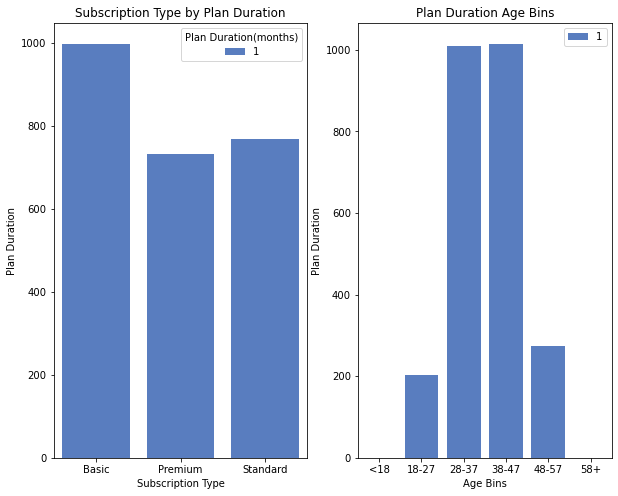

In [33]:
# Subscription type by plan duration

plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(data = df,
             x = 'Subscription Type',
             hue = 'Plan Duration(months)',
             palette='muted')
plt.title('Subscription Type by Plan Duration')
plt.ylabel('Plan Duration')

#plan duration of ages

plt.subplot(1,2,2)
sns.countplot(data = df,
             x = 'Age Bins',
             hue = 'Plan Duration(months)',
             palette='muted')

plt.legend(loc = 'upper right')
plt.title('Plan Duration Age Bins')
plt.ylabel('Plan Duration')

plt.show()

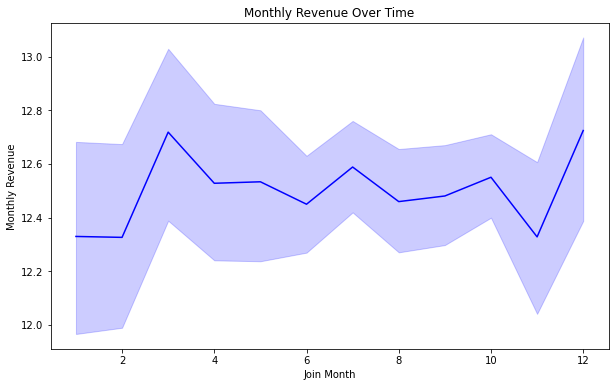

In [34]:
#Monthly revenue

plt.figure(figsize=(10,6))
sns.lineplot(x = 'Join Month',
            y = 'Monthly Revenue',
            data = df,
            estimator='mean',
            color = 'blue')
plt.title('Monthly Revenue Over Time')
plt.show()

# Thank you